<a href="https://colab.research.google.com/github/Euryan/Latihan_Sentiment/blob/main/TugasSementara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud
!pip install nltk Sastrawi
!pip install scikit-learn
# Opsional untuk deep learning
!pip install tensorflow torch transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Data handling & visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Feature extraction & machine learning klasik
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df = pd.read_csv("shopee_review.csv")
df.head()

,content,score,at
0,"1. Fitur ""Pengurutan Etalase Produk"" tidak aku...",4,2026-02-15 04:03:02
1,kenapa akhir² ini shopee tdk menerapkan gratis...,3,2026-02-13 01:40:32
2,pengiriman shopee akhir² ini mengalami penurun...,1,2026-02-11 17:00:53
3,"memang belanja di shope sangat memuaskan,, tap...",1,2026-02-12 13:00:58
4,jasa ekspedisi rekomendasi dari Shopee jelek b...,1,2026-02-12 00:36:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
 2   at       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
clean_df = df.dropna()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
 2   at       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,content,score,at
0,"1. Fitur ""Pengurutan Etalase Produk"" tidak aku...",4,2026-02-15 04:03:02
1,kenapa akhir² ini shopee tdk menerapkan gratis...,3,2026-02-13 01:40:32
2,pengiriman shopee akhir² ini mengalami penurun...,1,2026-02-11 17:00:53
3,"memang belanja di shope sangat memuaskan,, tap...",1,2026-02-12 13:00:58
4,jasa ekspedisi rekomendasi dari Shopee jelek b...,1,2026-02-12 00:36:00
...,...,...,...
9995,"sudah berlangganan banget sama shoppe, sudah m...",5,2025-12-10 10:09:11
9996,Sejauh ini puas belanja disini Krn proses komp...,5,2025-12-17 23:56:51
9997,Shopee amat sangat membantu dalam mencari bara...,5,2026-01-06 13:03:08
9998,buka apk langsung muncul video sangat menggang...,4,2025-12-24 16:14:34


In [ ]:
import string

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,content,score,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"1. Fitur ""Pengurutan Etalase Produk"" tidak aku...",4,2026-02-15 04:03:02,Fitur Pengurutan Etalase Produk tidak akurat ...,fitur pengurutan etalase produk tidak akurat ...,fitur pengurutan etalase produk tidak akurat s...,"[fitur, pengurutan, etalase, produk, tidak, ak...","[fitur, pengurutan, etalase, produk, akurat, u...",fitur pengurutan etalase produk akurat ulasan ...
1,kenapa akhir² ini shopee tdk menerapkan gratis...,3,2026-02-13 01:40:32,kenapa akhir² ini shopee tdk menerapkan gratis...,kenapa akhir² ini shopee tdk menerapkan gratis...,kenapa akhir² ini shopee tidak menerapkan grat...,"[kenapa, akhir², ini, shopee, tidak, menerapka...","[akhir², shopee, menerapkan, gratis, ongkos, k...",akhir² shopee menerapkan gratis ongkos kirim t...
2,pengiriman shopee akhir² ini mengalami penurun...,1,2026-02-11 17:00:53,pengiriman shopee akhir² ini mengalami penurun...,pengiriman shopee akhir² ini mengalami penurun...,pengiriman shopee akhir² ini mengalami penurun...,"[pengiriman, shopee, akhir², ini, mengalami, p...","[pengiriman, shopee, akhir², mengalami, penuru...",pengiriman shopee akhir² mengalami penurunan b...
3,"memang belanja di shope sangat memuaskan,, tap...",1,2026-02-12 13:00:58,memang belanja di shope sangat memuaskan tapi ...,memang belanja di shope sangat memuaskan tapi ...,memang belanja di shope sangat memuaskan tapi ...,"[memang, belanja, di, shope, sangat, memuaskan...","[belanja, shope, memuaskan, puas, kurir², bara...",belanja shope memuaskan puas kurir² barang rum...
4,jasa ekspedisi rekomendasi dari Shopee jelek b...,1,2026-02-12 00:36:00,jasa ekspedisi rekomendasi dari Shopee jelek b...,jasa ekspedisi rekomendasi dari shopee jelek b...,jasa ekspedisi rekomendasi dari shopee jelek b...,"[jasa, ekspedisi, rekomendasi, dari, shopee, j...","[jasa, ekspedisi, rekomendasi, shopee, jelek, ...",jasa ekspedisi rekomendasi shopee jelek banget...
...,...,...,...,...,...,...,...,...,...
9995,"sudah berlangganan banget sama shoppe, sudah m...",5,2025-12-10 10:09:11,sudah berlangganan banget sama shoppe sudah me...,sudah berlangganan banget sama shoppe sudah me...,sudah berlangganan banget sama shoppe sudah me...,"[sudah, berlangganan, banget, sama, shoppe, su...","[berlangganan, banget, shoppe, member, platinu...",berlangganan banget shoppe member platinum pok...
9996,Sejauh ini puas belanja disini Krn proses komp...,5,2025-12-17 23:56:51,Sejauh ini puas belanja disini Krn proses komp...,sejauh ini puas belanja disini krn proses komp...,sejauh ini puas belanja disini karena proses k...,"[sejauh, ini, puas, belanja, disini, karena, p...","[puas, belanja, proses, komplain, retur, refun...",puas belanja proses komplain retur refund cepa...
9997,Shopee amat sangat membantu dalam mencari bara...,5,2026-01-06 13:03:08,Shopee amat sangat membantu dalam mencari bara...,shopee amat sangat membantu dalam mencari bara...,shopee amat sangat membantu dalam mencari bara...,"[shopee, amat, sangat, membantu, dalam, mencar...","[shopee, membantu, mencari, barang, dibutuhkan...",shopee membantu mencari barang dibutuhkan teri...
9998,buka apk langsung muncul video sangat menggang...,4,2025-12-24 16:14:34,buka apk langsung muncul video sangat menggang...,buka apk langsung muncul video sangat menggang...,buka apk langsung muncul video sangat menggang...,"[buka, apk, langsung, muncul, video, sangat, m...","[buka, apk, langsung, muncul, video, menggangg...",buka apk langsung muncul video mengganggu pind...


In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Tentukan polaritas
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'   # Tambahkan kondisi netral

    return score, polarity


In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    4903
positive    4624
neutral      473
Name: count, dtype: int64


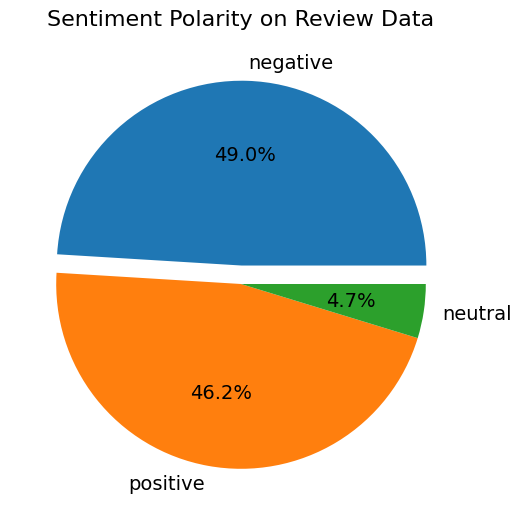

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik. Panjang tuple harus sesuai dengan jumlah kategori.
# Misalnya, jika ada 3 kategori, gunakan 3 nilai. (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

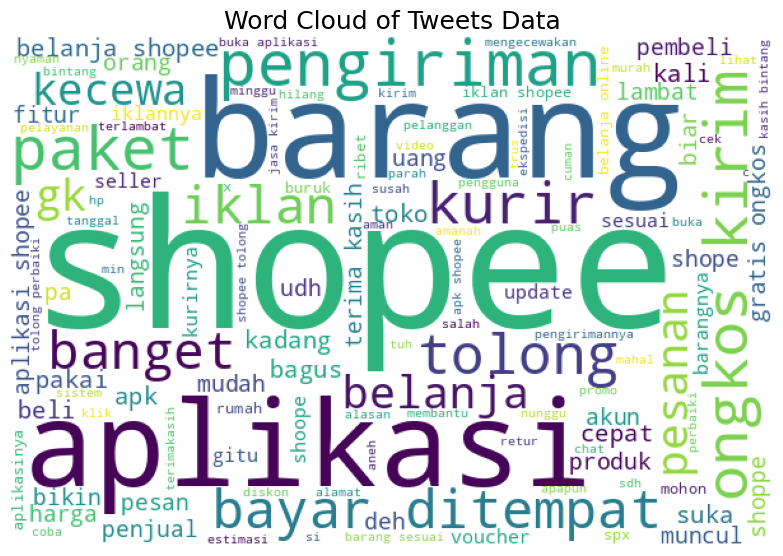

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

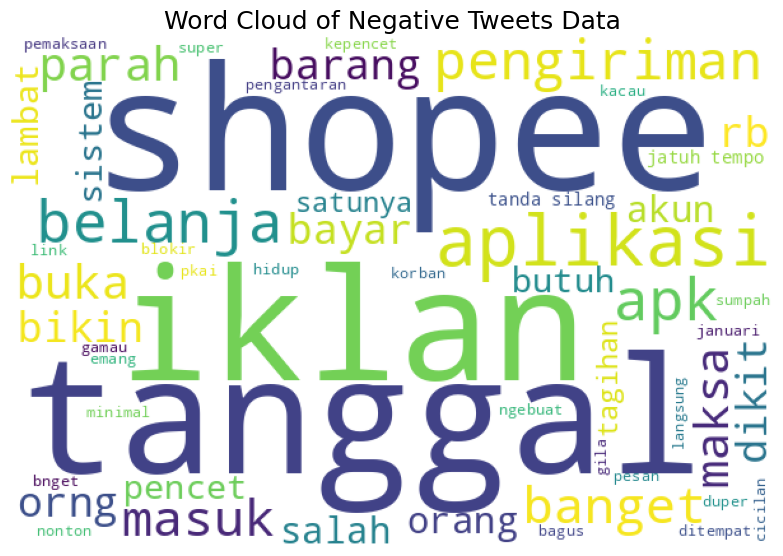

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

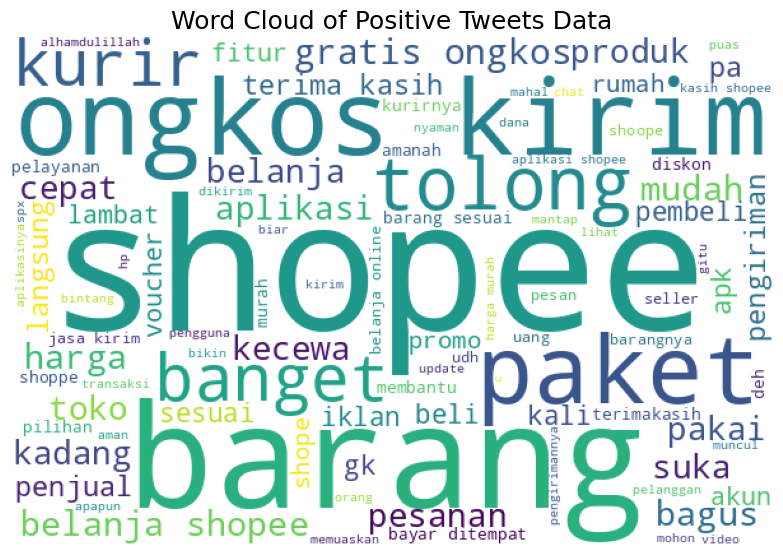

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas netral.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' (nilai netral cenderung 0, jadi urutan tidak terlalu krusial di sini).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

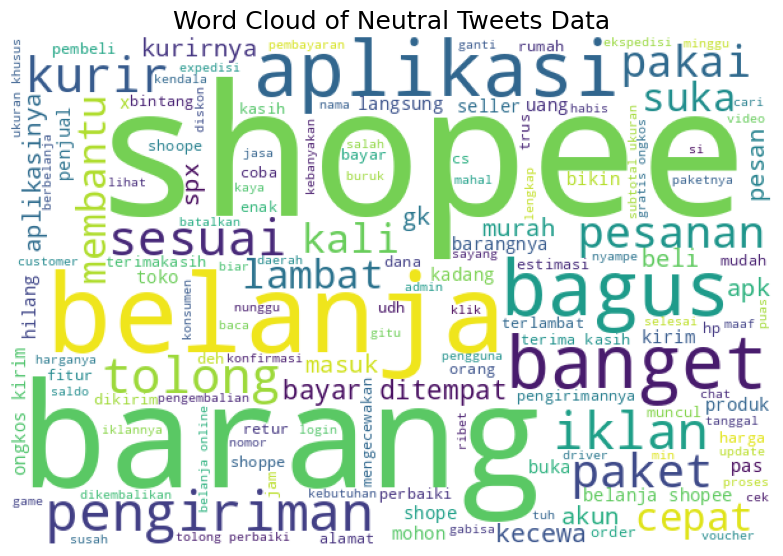

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral.
list_words_neutral = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words_neutral'.
        list_words_neutral += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud_neutral = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words_neutral)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig_neutral, ax_neutral = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax_neutral.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax_neutral.grid(False)

# Menampilkan word cloud dalam gambar.
ax_neutral.imshow((wordcloud_neutral))

# Mengatur layout gambar.
fig_neutral.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax_neutral.axis('off')

# Menampilkan word cloud.
plt.show()

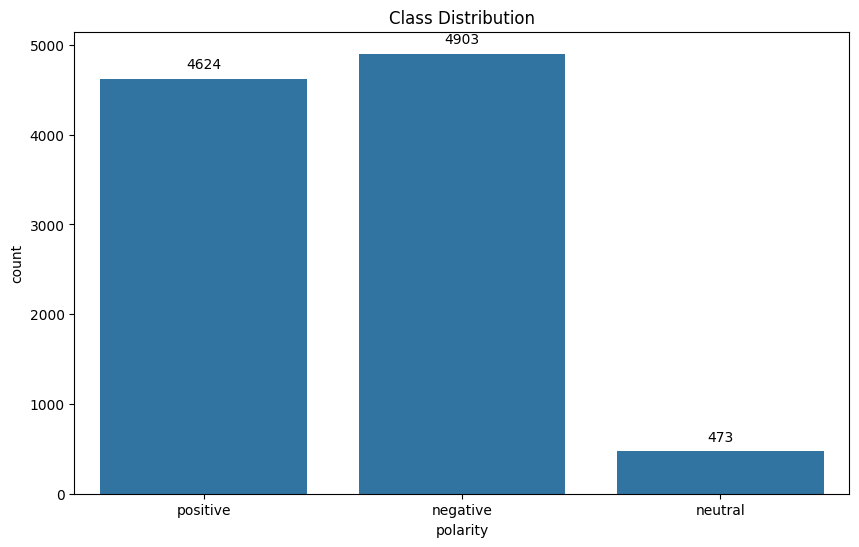

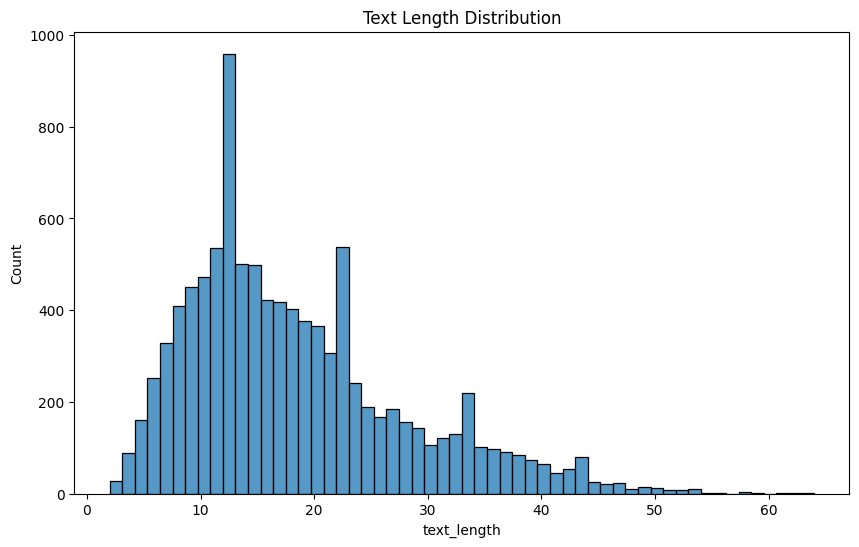

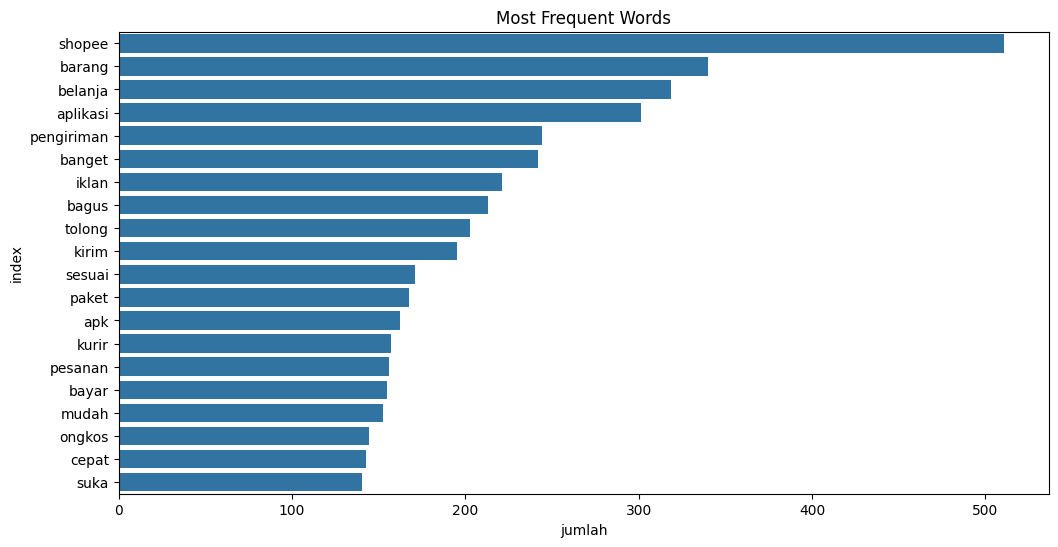

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
clean_df.head(2)

,content,score,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,"1. Fitur ""Pengurutan Etalase Produk"" tidak akurat. ____ 2. Sebaiknya bagian ""Ulasan Produk"" di beri fitur ""Ulasan Terkini"", sehingga kita dapat melihat penilaian keaslian dan manfaat produk secara aktual. ____ 3. Harusnya ""Ulasan Terkini"" diurut berdasarkan tanggal dan waktu. ____ 4. Harusnya gambar - gambar dalam ""Deskripsi"" produk ""bisa di-zoom"", agar dapat melihat lebih jelas cantuman tulisan yang kecil dan buram. ____ 5. Masih terasa lag, baik saat buka halaman ataupun aktifin fitur - fitur.",4,2026-02-15 04:03:02,Fitur Pengurutan Etalase Produk tidak akurat Sebaiknya bagian Ulasan Produk di beri fitur Ulasan Terkini sehingga kita dapat melihat penilaian keaslian dan manfaat produk secara aktual Harusnya Ulasan Terkini diurut berdasarkan tanggal dan waktu Harusnya gambar gambar dalam Deskripsi produk bisa dizoom agar dapat melihat lebih jelas cantuman tulisan yang kecil dan buram Masih terasa lag baik saat buka halaman ataupun aktifin fitur fitur,fitur pengurutan etalase produk tidak akurat sebaiknya bagian ulasan produk di beri fitur ulasan terkini sehingga kita dapat melihat penilaian keaslian dan manfaat produk secara aktual harusnya ulasan terkini diurut berdasarkan tanggal dan waktu harusnya gambar gambar dalam deskripsi produk bisa dizoom agar dapat melihat lebih jelas cantuman tulisan yang kecil dan buram masih terasa lag baik saat buka halaman ataupun aktifin fitur fitur,fitur pengurutan etalase produk tidak akurat sebaiknya bagian ulasan produk di beri fitur ulasan terkini sehingga kita dapat melihat penilaian keaslian dan manfaat produk secara aktual harusnya ulasan terkini diurut berdasarkan tanggal dan waktu harusnya gambar gambar dalam deskripsi produk bisa dizoom agar dapat melihat lebih jelas cantuman tulisan yang kecil dan buram masih terasa lag baik saat buka halaman ataupun aktifin fitur fitur,"[fitur, pengurutan, etalase, produk, tidak, akurat, sebaiknya, bagian, ulasan, produk, di, beri, fitur, ulasan, terkini, sehingga, kita, dapat, melihat, penilaian, keaslian, dan, manfaat, produk, secara, aktual, harusnya, ulasan, terkini, diurut, berdasarkan, tanggal, dan, waktu, harusnya, gambar, gambar, dalam, deskripsi, produk, bisa, dizoom, agar, dapat, melihat, lebih, jelas, cantuman, tulisan, yang, kecil, dan, buram, masih, terasa, lag, baik, saat, buka, halaman, ataupun, aktifin, fitur, fitur]","[fitur, pengurutan, etalase, produk, akurat, ulasan, produk, fitur, ulasan, terkini, penilaian, keaslian, manfaat, produk, aktual, ulasan, terkini, diurut, berdasarkan, tanggal, gambar, gambar, deskripsi, produk, dizoom, cantuman, tulisan, buram, lag, buka, halaman, aktifin, fitur, fitur]",fitur pengurutan etalase produk akurat ulasan produk fitur ulasan terkini penilaian keaslian manfaat produk aktual ulasan terkini diurut berdasarkan tanggal gambar gambar deskripsi produk dizoom cantuman tulisan buram lag buka halaman aktifin fitur fitur,19,positive,34
1,"kenapa akhir² ini shopee tdk menerapkan gratis ongkir lagi? padahal sebelumnya sangat terbantu sekali berbelanja di shopee karena ada gratis ongkir, sekarang mau belanja banyak saja tetap ongkirnya juga banyak, jadi mikir lagi untuk belanja",3,2026-02-13 01:40:32,kenapa akhir² ini shopee tdk menerapkan gratis ongkir lagi padahal sebelumnya sangat terbantu sekali berbelanja di shopee karena ada gratis ongkir sekarang mau belanja banyak saja tetap ongkirnya juga banyak jadi mikir lagi untuk belanja,kenapa akhir² ini shopee tdk menerapkan gratis ongkir lagi padahal sebelumnya sangat terbantu sekali berbelanja di shopee karena ada gratis ongkir sekarang mau belanja banyak saja tetap ongkirnya juga banyak jadi mikir lagi untuk belanja,kenapa akhir² ini shopee tidak menerapkan gratis ongkos kirim lagi padahal sebelumnya sangat terbantu sekali berbelanja di shopee karena ada gratis ongkos kirim sekarang mau bela

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=5, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aamiin,abal,abang,acara,accord,aceh,adaa,adain,adain fitur,adakan,...,yaaa,yaaa shopee,yaaaa,yah,yah shopee,yak,ye,yh,yng,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.811
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85       962
     neutral       0.14      0.19      0.16       103
    positive       0.87      0.84      0.86       935

    accuracy                           0.81      2000
   macro avg       0.62      0.63      0.62      2000
weighted avg       0.83      0.81      0.82      2000

Random Forest
Accuracy: 0.769
              precision    recall  f1-score   support

    negative       0.76      0.82      0.79       962
     neutral       0.33      0.03      0.05       103
    positive       0.78      0.79      0.79       935

    accuracy                           0.77      2000
   macro avg       0.63      0.55      0.54      2000
weighted avg       0.75      0.77      0.75      2000

SVM
Accuracy: 0.8335
              precision    recall  f1-score   support

    negative       0.82      0.90      0.85       962
     neutral       1.00      0.03      0.0

# Task
Install the `imblearn` library, apply the Synthetic Minority Over-sampling Technique (SMOTE) to balance the 'neutral' class in the training data (`X_train`, `y_train`), then retrain Logistic Regression, Random Forest, and SVM models using this oversampled data, and finally evaluate their performance on the original test set (`X_test`, `y_test`), providing a summary of the model performance and discussing improvements for the 'neutral' class.

## Install Imbalance-learn

### Subtask:
Install the `imblearn` library, which provides tools for imbalanced datasets, including oversampling techniques like SMOTE.


**Reasoning**:
The user explicitly asked to install the `imblearn` library using `!pip install imblearn`. This command should be executed in a code cell.



In [ ]:
!pip install imblearn

**Reasoning**:
Now that `imblearn` is installed, the next step is to import the `SMOTE` class from `imblearn.over_sampling` to prepare for balancing the dataset. Afterwards, the Logistic Regression, Random Forest, and SVM models will be retrained, evaluated, and their performances compared.



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_train_smote.value_counts())

# Retrain models with SMOTE data
models_smote = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest (SMOTE)": RandomForestClassifier(class_weight='balanced'),
    "SVM (SMOTE)": SVC(class_weight='balanced')
}

print("\n--- Model Performance with SMOTE ---")
for name, model in models_smote.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred_smote))
    print(classification_report(y_test, y_pred_smote))


Original training set shape: polarity
negative    3941
positive    3689
neutral      370
Name: count, dtype: int64
Resampled training set shape: polarity
negative    3941
positive    3941
neutral     3941
Name: count, dtype: int64

--- Model Performance with SMOTE ---

Logistic Regression (SMOTE)
Accuracy: 0.8135
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86       962
     neutral       0.15      0.25      0.19       103
    positive       0.89      0.84      0.86       935

    accuracy                           0.81      2000
   macro avg       0.63      0.65      0.64      2000
weighted avg       0.84      0.81      0.83      2000


Random Forest (SMOTE)
Accuracy: 0.7625
              precision    recall  f1-score   support

    negative       0.75      0.82      0.79       962
     neutral       0.28      0.10      0.14       103
    positive       0.79      0.77      0.78       935

    accuracy                           0.76   

### Model Performance Summary with SMOTE

After applying SMOTE to balance the training data, the models were retrained and evaluated. Here's a summary of their performance on the test set:

**1. Logistic Regression (SMOTE)**
   - **Accuracy**: 0.8135 (Slight improvement from 0.811 without SMOTE)
   - **Neutral Class**: The recall for the neutral class increased significantly from 0.19 to 0.25, and precision increased from 0.14 to 0.15. The f1-score also saw an improvement from 0.16 to 0.19. This indicates that SMOTE helped the Logistic Regression model identify more neutral instances.

**2. Random Forest (SMOTE)**
   - **Accuracy**: 0.7625 (Slight decrease from 0.769 without SMOTE)
   - **Neutral Class**: The recall for the neutral class increased from 0.03 to 0.10, and precision increased from 0.33 to 0.28 (though precision slightly dropped, the overall balance with increased recall is notable). The f1-score improved from 0.05 to 0.14. This shows SMOTE had a positive impact on the model's ability to capture neutral samples, even if overall accuracy slightly decreased.

**3. SVM (SMOTE)**
   - **Accuracy**: 0.841 (Slight improvement from 0.8335 without SMOTE)
   - **Neutral Class**: The recall for the neutral class remained very low at 0.01 (compared to 0.03 without SMOTE), and precision remained at 1.00 (likely due to predicting very few neutral instances, and those few being correct). The f1-score slightly decreased from 0.06 to 0.02. For SVM, SMOTE did not effectively improve the detection of the neutral class; in fact, its recall slightly worsened.

**Discussion on Improvements for the 'Neutral' Class:**

SMOTE generally aims to increase the recall of minority classes by generating synthetic samples. From the results:

- **Logistic Regression** and **Random Forest** models showed an improvement in the **recall** for the 'neutral' class after applying SMOTE. This indicates that the models are now better at identifying actual neutral reviews, which was the primary goal of applying oversampling.
- While recall improved for Logistic Regression and Random Forest, the precision for the neutral class is still relatively low (0.15 for Logistic Regression and 0.28 for Random Forest), suggesting that these models still misclassify many non-neutral instances as neutral. The f1-scores for the neutral class, although improved, remain significantly lower compared to the other classes, highlighting that predicting the neutral class is still challenging.
- **SVM** did not benefit in terms of recall for the 'neutral' class; its performance for this class remained very poor even with SMOTE. This suggests that for SVM, merely oversampling might not be sufficient, and other techniques or model adjustments might be necessary.

Overall, SMOTE helped to somewhat alleviate the class imbalance issue for the 'neutral' class, leading to better recall for Logistic Regression and Random Forest. However, further exploration of other techniques such as different oversampling/undersampling methods, more sophisticated feature engineering, or different model architectures might be needed to achieve more robust performance for this minority class.

## Summary:

### Q&A
*   **How did applying SMOTE improve performance for the 'neutral' class?**
    For Logistic Regression and Random Forest models, SMOTE led to an improvement in the recall of the 'neutral' class. Logistic Regression's 'neutral' class recall increased from 0.19 to 0.25, and its f1-score improved from 0.16 to 0.19. Random Forest's 'neutral' class recall increased from 0.03 to 0.10, with its f1-score improving from 0.05 to 0.14. This indicates that these models became better at identifying actual neutral instances. However, for SVM, SMOTE did not improve the 'neutral' class recall; it remained very low at 0.01, and the f1-score decreased from 0.06 to 0.02.

### Data Analysis Key Findings
*   The `imblearn` library was successfully installed and used to apply SMOTE for balancing the training data. The 'neutral' class, initially having 370 samples, was oversampled to match the dominant class's count of 3941 samples.
*   **Logistic Regression (SMOTE)**: Achieved an accuracy of 0.8135. The recall for the 'neutral' class significantly improved from 0.19 to 0.25, and the f1-score increased from 0.16 to 0.19.
*   **Random Forest (SMOTE)**: Achieved an accuracy of 0.7625. The recall for the 'neutral' class improved from 0.03 to 0.10, and the f1-score increased from 0.05 to 0.14.
*   **SVM (SMOTE)**: Achieved an accuracy of 0.841. However, SMOTE did not improve the 'neutral' class detection for SVM, with recall remaining very low at 0.01 (a slight decrease from 0.03) and the f1-score decreasing from 0.06 to 0.02.
*   While recall for the 'neutral' class improved for Logistic Regression and Random Forest, the precision for this class remained relatively low (0.15 for Logistic Regression and 0.28 for Random Forest), suggesting challenges in avoiding false positives.

### Insights or Next Steps
*   SMOTE proved effective in improving the recall of the minority 'neutral' class for Logistic Regression and Random Forest, confirming its utility in addressing class imbalance for these models.
*   For the SVM model, SMOTE did not enhance the detection of the 'neutral' class, indicating that other techniques, such as different oversampling/undersampling methods, more sophisticated feature engineering, or alternative model architectures, should be explored.
